In [1]:
import torch

In [2]:
from torch import nn,optim
from torch.autograd.variable import Variable
from torchvision import datasets,transforms


In [3]:
from utils import Logger

In [4]:
def mnist_data():
    compose = transforms.Compose([transforms.ToTensor(),
                                 transforms.Normalize((.5,.5,.5),(.5,.5,.5))])
    out_dir = './dataset'
    
    return datasets.MNIST(root = out_dir,train = True,transform=compose,download = True)


data = mnist_data()

dataloader = torch.utils.data.DataLoader(data,batch_size =100,shuffle=True)
num_batches = len(dataloader)


In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator,self).__init__()
        n_features = 784
        n_out = 1
        
        self.hidden0 = nn.Sequential(nn.Linear(n_features,1024),
                                    nn.LeakyReLU(0.2),
                                    nn.Dropout(0.3))
        self.hidden1 = nn.Sequential(nn.Linear(1024,512),
                                    nn.LeakyReLU(0.2),
                                    nn.Dropout(0.2))
        
        self.hidden2 = nn.Sequential(nn.Linear(512,256),
                                    nn.LeakyReLU(0.2),
                                    nn.Dropout(0.2))
        self.out = nn.Sequential(nn.Linear(256,n_out),
                                    nn.Sigmoid())
        
    
    def forward(self,x):
        x = self.hidden0(x)
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.out(x)
        return x
    
        

In [6]:
discriminator = Discriminator()

In [7]:
print(discriminator)

Discriminator(
  (hidden0): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3)
  )
  (hidden1): Sequential(
    (0): Linear(in_features=1024, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.2)
  )
  (hidden2): Sequential(
    (0): Linear(in_features=512, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.2)
  )
  (out): Sequential(
    (0): Linear(in_features=256, out_features=1, bias=True)
    (1): Sigmoid()
  )
)


In [8]:
def images_to_vector(images):
    return images.view(images.shape[0],784)

In [9]:
def vector_to_images(vector):
    return vector.view(vector.shape[0],1,28,28)

In [10]:
class Generator(torch.nn.Module):
    def __init__(self):
        super(Generator,self).__init__()
        n_features = 100
        n_out = 784
        
        self.hidden0 = nn.Sequential(nn.Linear(n_features,256),
                                    nn.LeakyReLU(0.2))
        self.hidden1 = nn.Sequential(nn.Linear(256,512),
                                    nn.LeakyReLU(0.2))
        self.hidden2 = nn.Sequential(nn.Linear(512,1024),
                                    nn.LeakyReLU(0.2))
        self.out = nn.Sequential(nn.Linear(1024,n_out),
                                nn.Tanh())
    
    def forward(self,x):
        x = self.hidden0(x)
        x = self.hidden1(x)
        x = self.hidden2(x)
        x =self.out(x)
        return x
        

In [11]:
generator = Generator()

In [12]:
print(generator)

Generator(
  (hidden0): Sequential(
    (0): Linear(in_features=100, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (hidden1): Sequential(
    (0): Linear(in_features=256, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (hidden2): Sequential(
    (0): Linear(in_features=512, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (out): Sequential(
    (0): Linear(in_features=1024, out_features=784, bias=True)
    (1): Tanh()
  )
)


In [13]:
def noise(size):
    n = Variable(torch.randn(size,100))
    return n

In [14]:
x = noise(10)
print(x.size())

torch.Size([10, 100])


In [15]:
x

tensor([[ 2.6507e-01, -4.6482e-01,  9.9365e-02,  1.5184e+00,  5.0334e-01,
         -1.5808e+00, -7.1603e-01, -1.5952e+00, -1.4726e+00, -1.5542e+00,
         -6.7083e-01,  4.6273e-01, -6.9607e-01, -3.0502e-01, -8.4643e-01,
         -2.1869e-01,  1.9892e+00,  4.2654e-01, -1.5897e+00, -1.2186e+00,
         -1.3860e-01,  9.2800e-01, -5.3370e-01,  5.8063e-01,  1.3956e+00,
          2.6613e-01, -1.2185e+00, -7.4326e-01,  1.0964e+00,  2.1324e-01,
         -6.9150e-01,  1.1263e+00,  9.9148e-01,  1.3946e+00,  1.0415e+00,
          8.7863e-01,  4.6590e-01, -1.5659e-01,  5.7457e-02,  3.2515e+00,
         -1.3980e-01, -4.2973e-02, -1.4188e+00, -2.3126e-01,  2.4861e-01,
         -1.0802e+00,  3.1698e-01, -6.7102e-01,  7.0196e-01,  5.9503e-01,
         -6.9719e-01, -1.1894e-02, -3.3912e-01, -1.0011e+00,  2.6235e-01,
          1.4641e+00, -6.2977e-01, -2.6074e-01,  7.0039e-02,  1.8531e-01,
         -2.3712e-01, -1.2625e+00,  6.0898e-01, -1.4556e+00, -1.4508e+00,
         -1.7550e+00,  3.5106e-01, -1.

In [16]:
d_optimizer = optim.Adam(discriminator.parameters(),lr = 0.0002)
g_optimizer = optim.Adam(generator.parameters(),lr = 0.0002)

In [17]:
loss = nn.BCELoss()

In [18]:
def ones_target(size):
    data = Variable(torch.ones(size,1))
    return data

In [19]:
def zeros_target(size):
    data = Variable(torch.zeros(size,1))
    return data

In [20]:
def train_discriminator(optimizer,real_data,fake_data):
    N = real_data.size(0)
    optimizer.zero_grad()
    
    #Training on real data
    prediction_real = discriminator(real_data)
    error_real = loss(prediction_real,ones_target(N))
    error_real.backward()
    
    # Training on fake_data
    prediction_fake = discriminator(fake_data)
    error_fake = loss(prediction_fake,zeros_target(N))
    error_fake.backward()
    
    optimizer.step()
    
    return error_real + error_fake,prediction_real,prediction_fake

In [21]:
def train_generator(optimizer,fake_data):
    N = fake_data.size(0)
    optimizer.zero_grad()
    
    pred = discriminator(fake_data)
    error = loss(pred,ones_target(N))
    error.backward()
    
    optimizer.step()
    
    return error

In [22]:
num_test_samples = 16
test_noise = noise(num_test_samples)

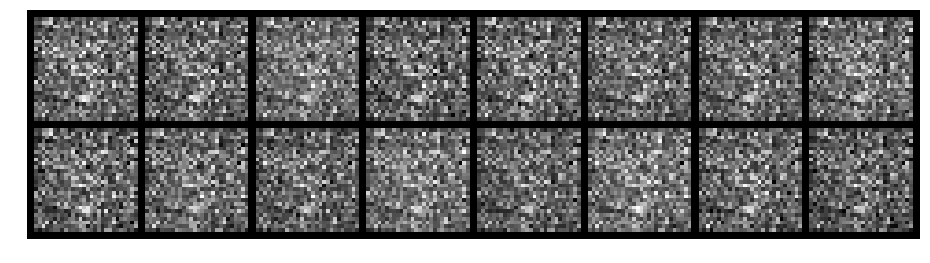

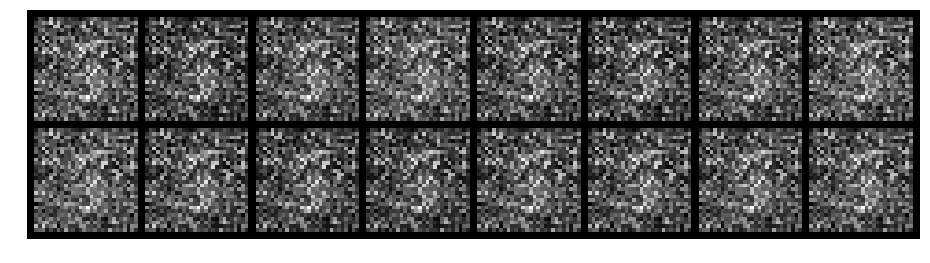

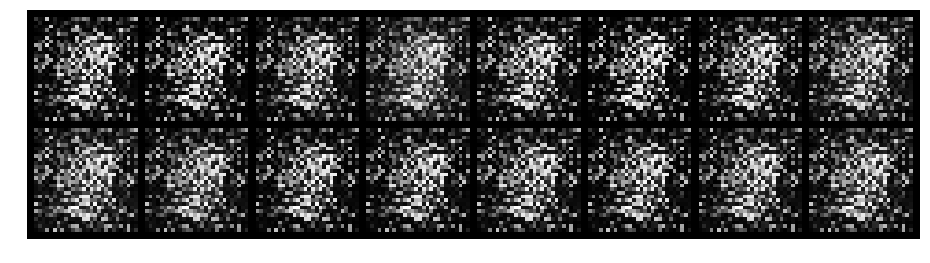

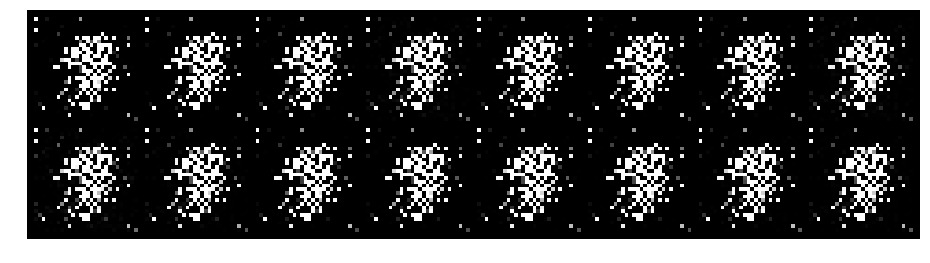

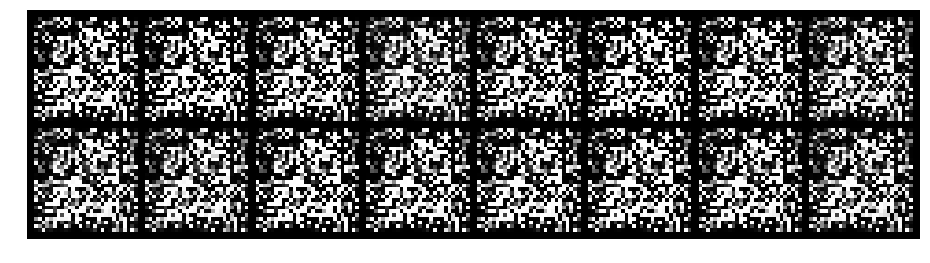

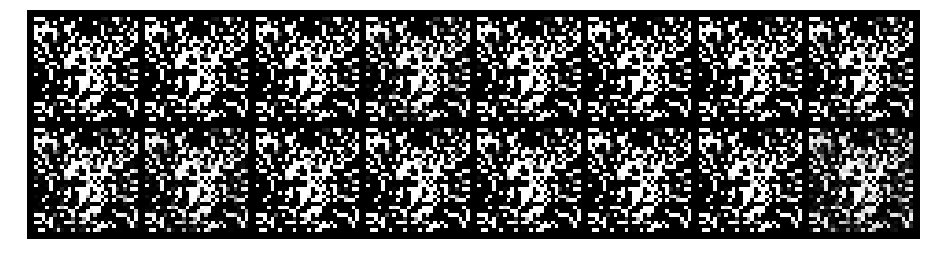

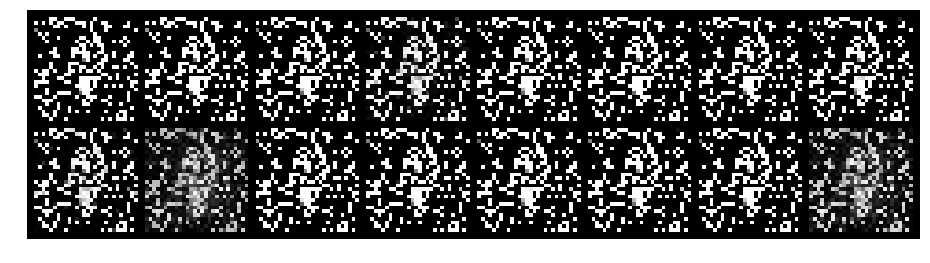

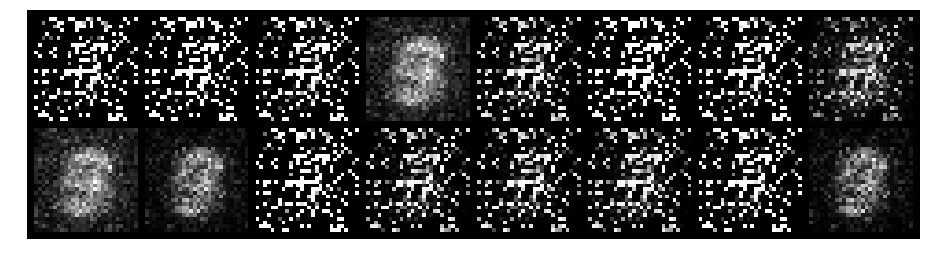

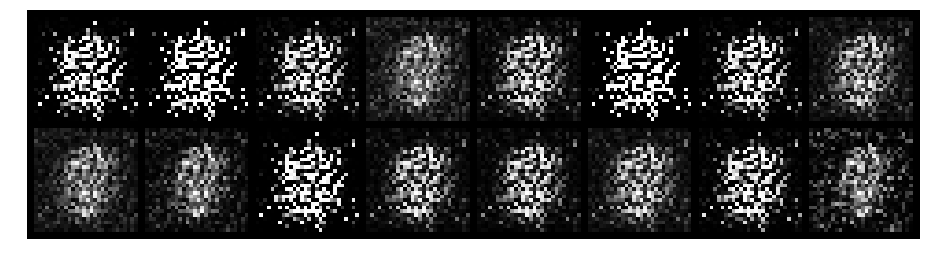

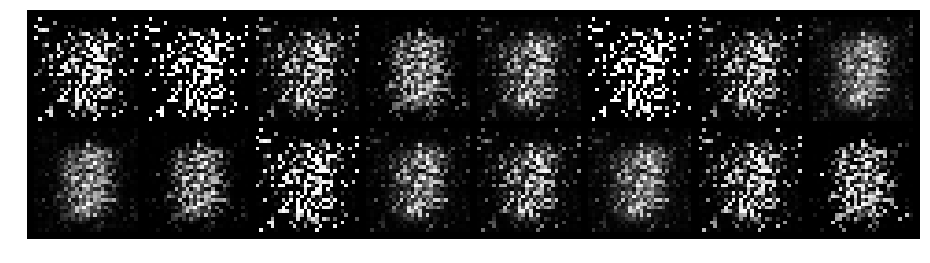

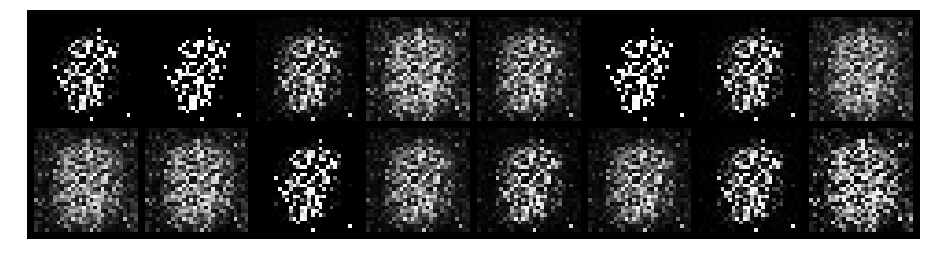

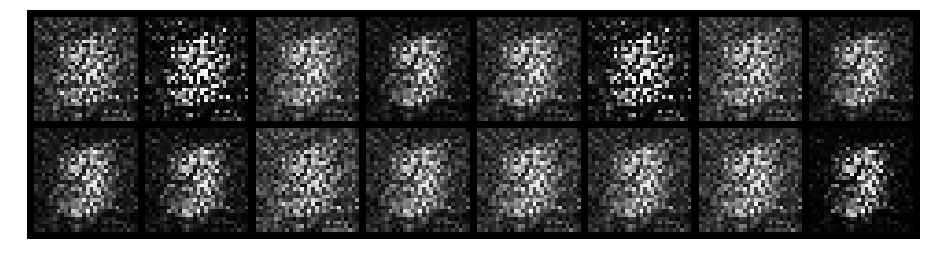

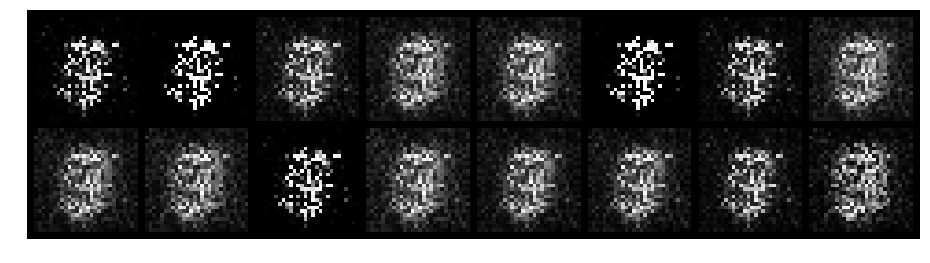

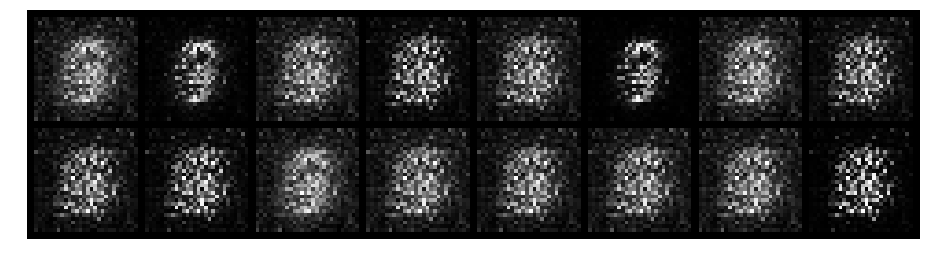

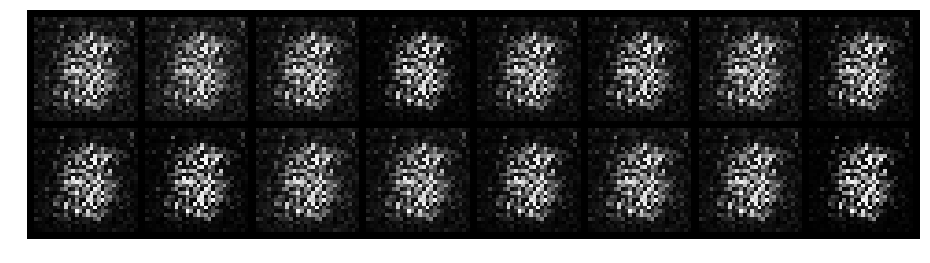

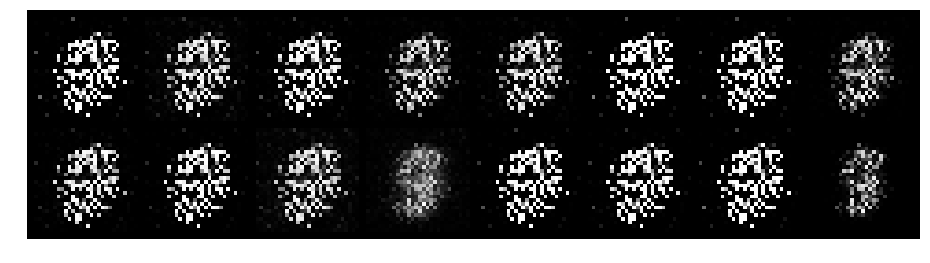

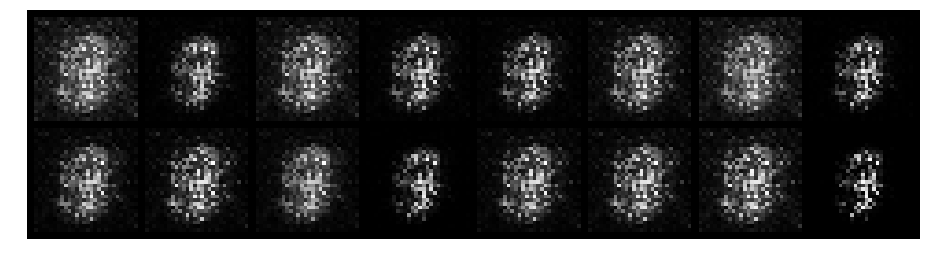

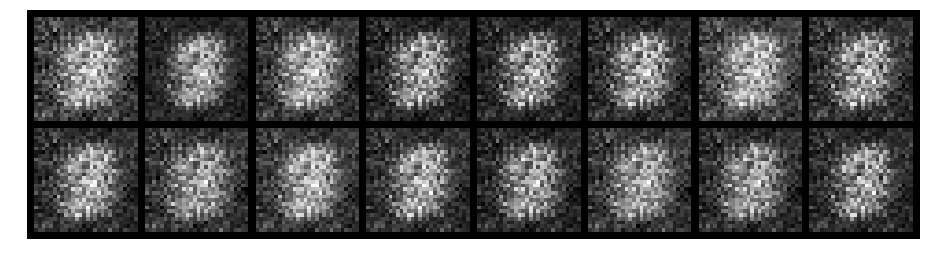

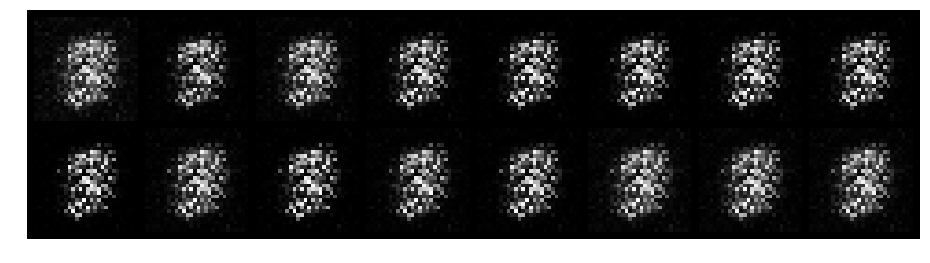

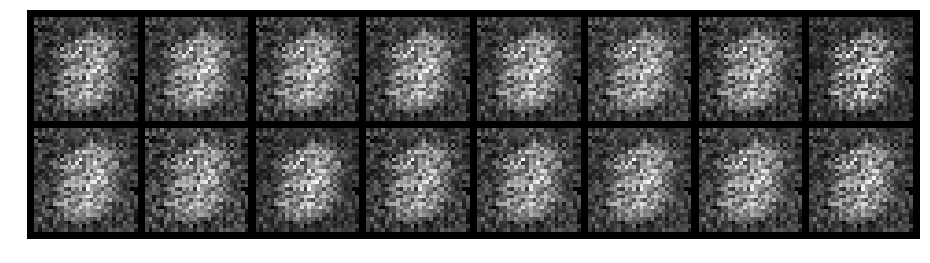

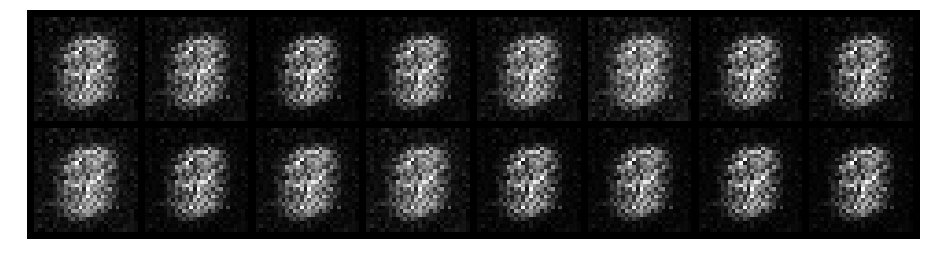

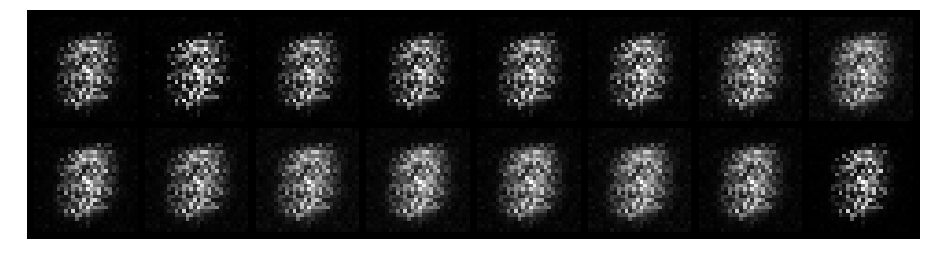

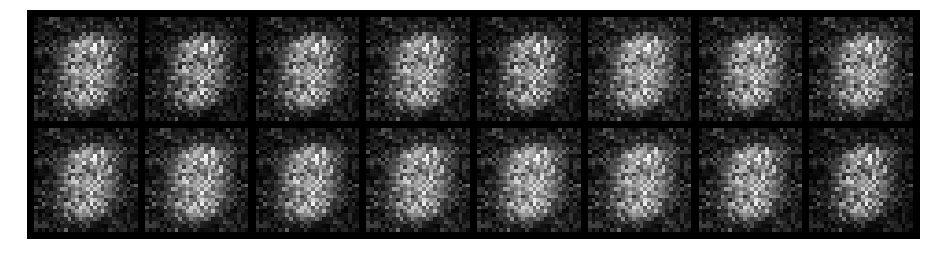

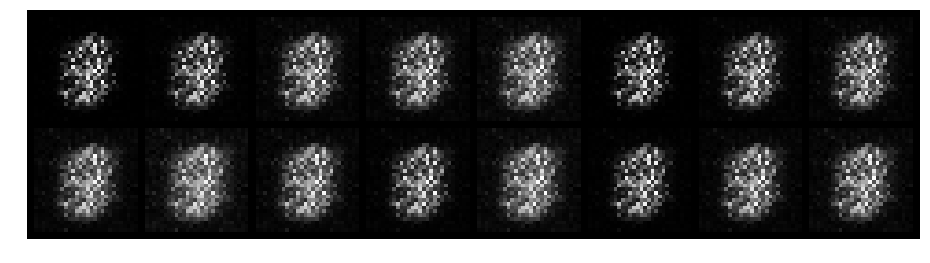

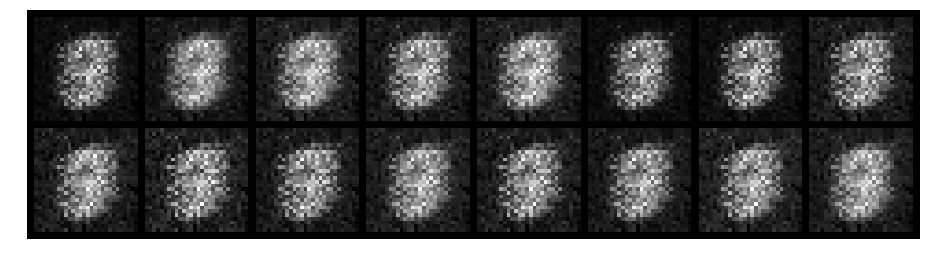

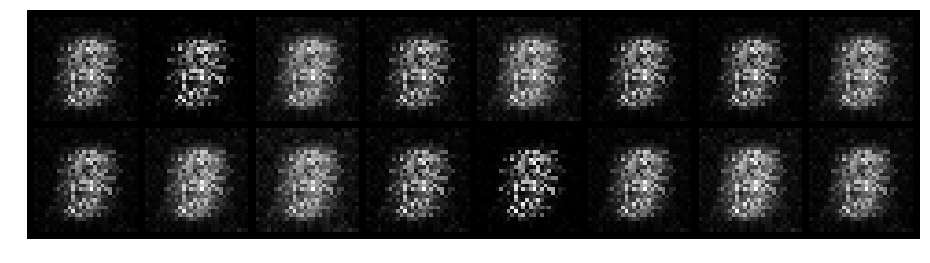

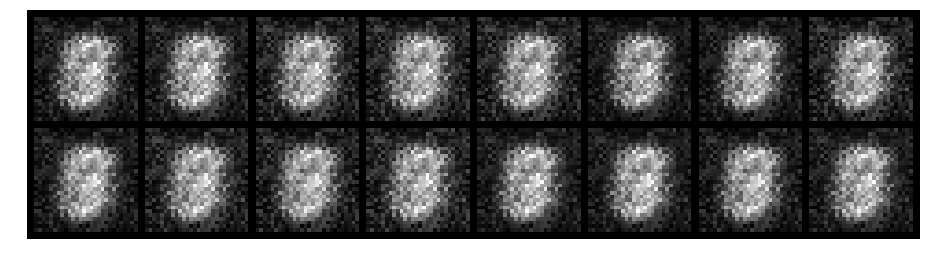

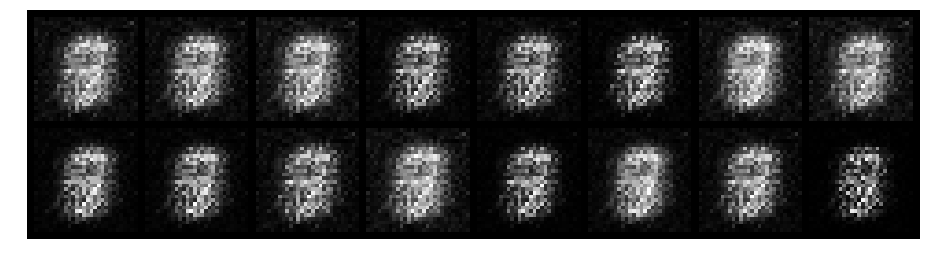

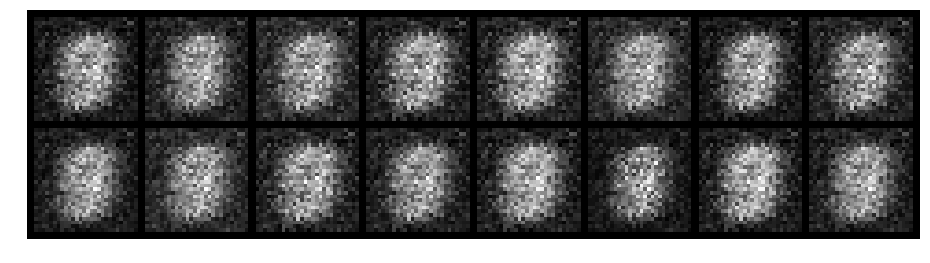

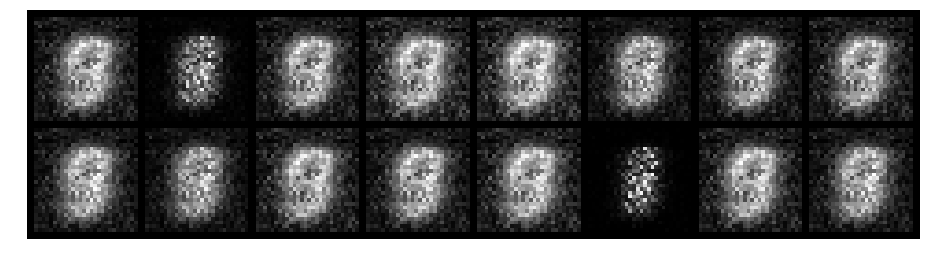

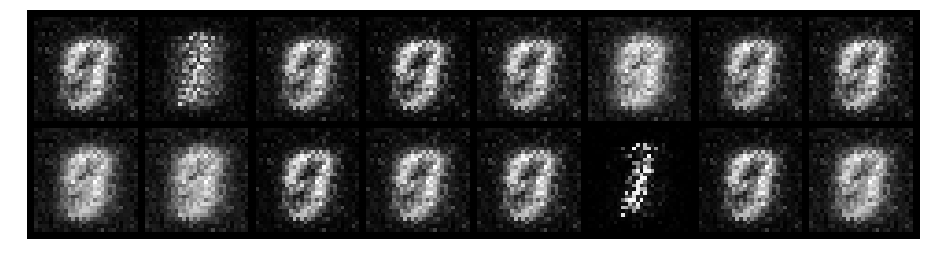

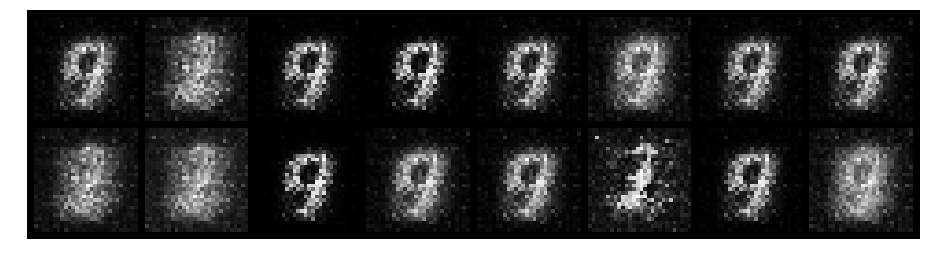

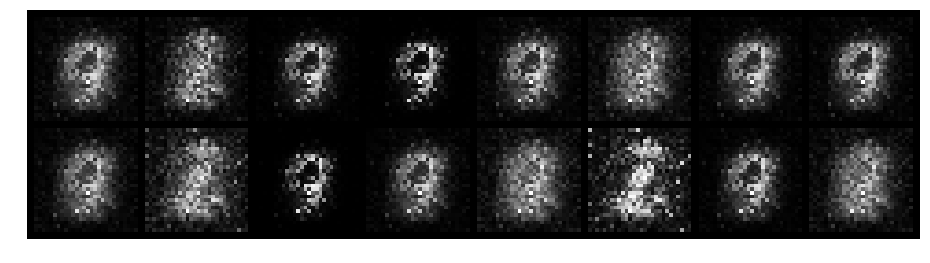

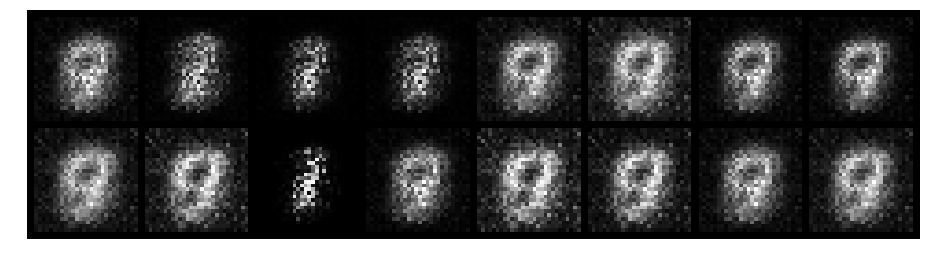

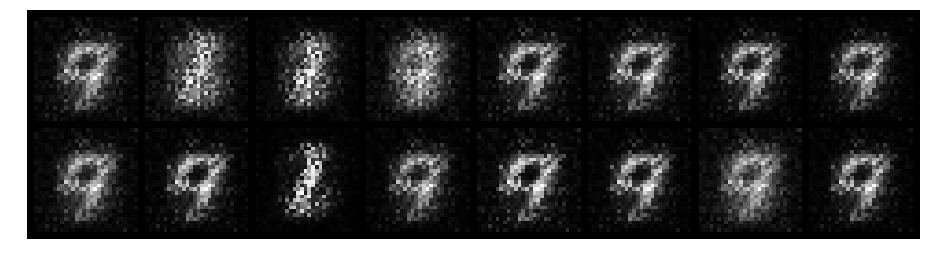

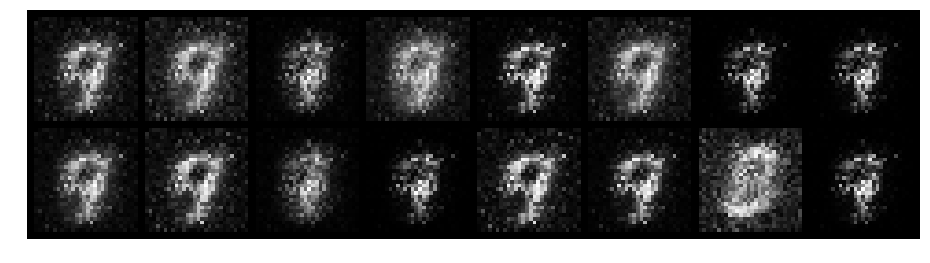

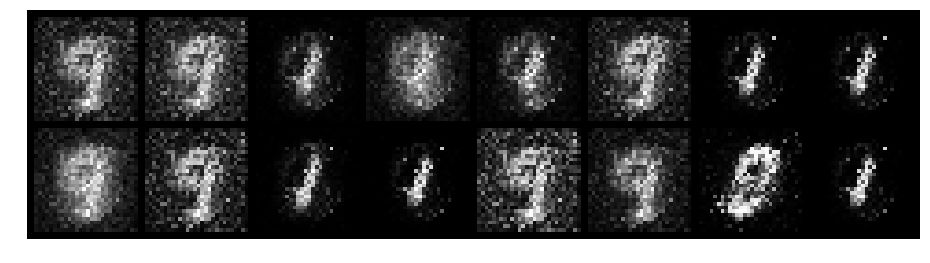

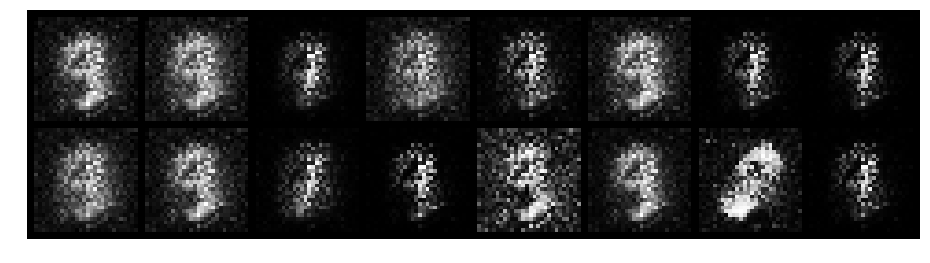

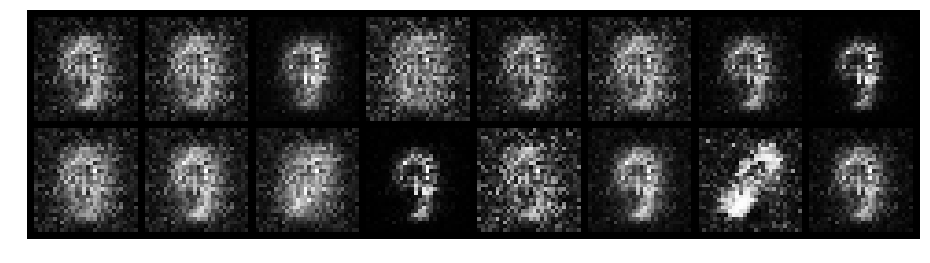

In [ ]:
logger = Logger(model_name = 'GAN',data_name = 'MNIST')

num_epochs = 200

for epoch in range(1,epochs):
    for n_batch,(real_batch,_) in enumerate(dataloader):
        N = real_batch.size(0)
        
        #training discriminator
        real_data = Variable(images_to_vector(real_batch))
        fake_data = generator(noise(N)).detach()
        d_error,d_pred_real,d_pred_fake = train_discriminator(d_optimizer,real_data,fake_data)
        
        #training generator
        fake_data = generator(noise(N))
        g_error = train_generator(g_optimizer,fake_data)
        
        #log batch error
        logger.log(d_error,g_error,epoch,n_batch,num_batches)
        
        if(n_batch % 100 == 0):
            test_images = vector_to_images(generator(test_noise))
            test_images = test_images.data
            
            logger.log_images(test_images,num_test_samples,epoch,n_batch,num_batches)
            
            #logger.display_status(str(epoch), str(num_epochs), n_batch, num_batches, d_error, g_error, d_pred_real, d_pred_fake)
        
        #code works but need to fix logger
        # to do - fix logger and write code for gpu training